In [1]:
#10.1.1 희소표현(Sparse Representation)

In [2]:
import pandas as pd
class2=pd.read_csv("../chap10/data/class2.csv")

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

train_x = label_encoder.fit_transform(class2['class2'])
train_x

array([2, 2, 1, 0, 1, 0])

In [3]:
#10.1.2 횟수기반 임베딩
#Counter Vector

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is last chance.',
    'and if you do not have this chance.',
    'you will never get any chance.',
    'will you do get this one?',
    'please, get this chance',
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 13,
 'is': 7,
 'last': 8,
 'chance': 2,
 'and': 0,
 'if': 6,
 'you': 15,
 'do': 3,
 'not': 10,
 'have': 5,
 'will': 14,
 'never': 9,
 'get': 4,
 'any': 1,
 'one': 11,
 'please': 12}

In [5]:
vect.transform(['you will never get any chance.']).toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]], dtype=int64)

In [6]:
vect = CountVectorizer(stop_words=["and", "is", "please", "this"]).fit(corpus)
vect.vocabulary_

{'last': 6,
 'chance': 1,
 'if': 5,
 'you': 11,
 'do': 2,
 'not': 8,
 'have': 4,
 'will': 10,
 'never': 7,
 'get': 3,
 'any': 0,
 'one': 9}

In [7]:
#TF-IDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
doc = ['I like machine learning', 'I love deep learning', 'I run everyday']
tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(doc)
doc_distance = (tfidf_matrix * tfidf_matrix.T)
print ('유사도를 위한', str(doc_distance.get_shape()[0]), 'x', str(doc_distance.get_shape()[1]), '행렬을 만들었습니다.')
print(doc_distance.toarray())

유사도를 위한 3 x 3 행렬을 만들었습니다.
[[1.       0.224325 0.      ]
 [0.224325 1.       0.      ]
 [0.       0.       1.      ]]


In [9]:
#10.1.3 예측기반 임베딩
# Word2Vec

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec 
  
sample = open("../chap10/data/peter.txt", "r", encoding='UTF8')
s = sample.read() 
  
f = s.replace("\n", " ")
data = [] 
  
for i in sent_tokenize(f):
    temp = [] 
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp) 

data

[['once',
  'upon',
  'a',
  'time',
  'in',
  'london',
  ',',
  'the',
  'darlings',
  'went',
  'out',
  'to',
  'a',
  'dinner',
  'party',
  'leaving',
  'their',
  'three',
  'children',
  'wendy',
  ',',
  'jhon',
  ',',
  'and',
  'michael',
  'at',
  'home',
  '.'],
 ['after',
  'wendy',
  'had',
  'tucked',
  'her',
  'younger',
  'brothers',
  'jhon',
  'and',
  'michael',
  'to',
  'bed',
  ',',
  'she',
  'went',
  'to',
  'read',
  'a',
  'book',
  '.'],
 ['she', 'heard', 'a', 'boy', 'sobbing', 'outside', 'her', 'window', '.'],
 ['he', 'was', 'flying', '.'],
 ['there', 'was', 'little', 'fairy', 'fluttering', 'around', 'him', '.'],
 ['wendy', 'opened', 'the', 'window', 'to', 'talk', 'to', 'him', '.'],
 ['“', 'hello', '!'],
 ['who', 'are', 'you', '?'],
 ['why', 'are', 'you', 'crying', '”', ',', 'wendy', 'asked', 'him', '.'],
 ['“', 'my', 'name', 'is', 'peter', 'pan', '.'],
 ['my',
  'shadow',
  'wouldn',
  '’',
  't',
  'stock',
  'to',
  'me.',
  '”',
  ',',
  'he',
  'rep

In [11]:
#CBOW

In [12]:
model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              size = 100, window = 5)
print("Cosine similarity between 'peter' " +
                 "'wendy' - CBOW : ", 
      model1.similarity('peter', 'wendy'))

Cosine similarity between 'peter' 'wendy' - CBOW :  1.0


In [13]:
print("Cosine similarity between 'peter' " +
                 "'hook' - CBOW : ", 
      model1.similarity('peter', 'hook')) 

Cosine similarity between 'peter' 'hook' - CBOW :  0.06274099


In [14]:
#Skip-gram

In [15]:
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
                                             window = 5, sg = 1)
print("Cosine similarity between 'peter' " +
          "wendy' - Skip Gram : ", 
    model2.similarity('peter', 'wendy'))

Cosine similarity between 'peter' wendy' - Skip Gram :  0.31566966


In [16]:
print("Cosine similarity between 'peter' " +
            "hook' - Skip Gram : ", 
      model2.similarity('peter', 'hook')) 

Cosine similarity between 'peter' hook' - Skip Gram :  0.5157193


In [17]:
#FastText

In [18]:
from gensim.test.utils import common_texts
from gensim.models import FastText

model = FastText('../chap10/data/peter.txt', size=4, window=3, min_count=1, iter=10)

In [19]:
sim_score = model.wv.similarity('peter', 'wendy')
print(sim_score)

0.14111584


In [20]:
sim_score = model.wv.similarity('peter', 'hook')
print(sim_score)

0.22405876


In [21]:
#wiki.ko.vec 파일 내려받은 후 실습
from __future__ import print_function
from gensim.models import KeyedVectors

model_kr = KeyedVectors.load_word2vec_format('../chap10/data/wiki.ko.vec')

In [22]:
find_similar_to = '노력'

for similar_word in model_kr.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.2f}".format(
        similar_word[0], similar_word[1]
    ))

Word: 노력함, Similarity: 0.80
Word: 노력중, Similarity: 0.75
Word: 노력만, Similarity: 0.72
Word: 노력과, Similarity: 0.71
Word: 노력의, Similarity: 0.69
Word: 노력가, Similarity: 0.69
Word: 노력이나, Similarity: 0.69
Word: 노력없이, Similarity: 0.68
Word: 노력맨, Similarity: 0.68
Word: 노력보다는, Similarity: 0.68


In [23]:
similarities = model_kr.wv.most_similar(positive=['동물', '육식동물'], negative=['사람'])
print(similarities)

[('초식동물', 0.7804122567176819), ('거대동물', 0.7547270059585571), ('육식동물의', 0.7547166347503662), ('유두동물', 0.7535113096237183), ('반추동물', 0.7470757961273193), ('독동물', 0.7466292381286621), ('육상동물', 0.746031641960144), ('유즐동물', 0.7450904846191406), ('극피동물', 0.7449344992637634), ('복모동물', 0.7424346208572388)]


In [24]:
#10.1.4 횟수/예측기반 임베딩
#GloVe

In [25]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = datapath('../chap10/data/glove.6B.100d.txt') #오류 발생 시 절대 경로로 변경
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

In [26]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
model.most_similar('bill')

[('legislation', 0.8072140216827393),
 ('proposal', 0.7306863069534302),
 ('senate', 0.7142540812492371),
 ('bills', 0.7044401168823242),
 ('measure', 0.6958035230636597),
 ('passed', 0.6906244158744812),
 ('amendment', 0.6846879720687866),
 ('provision', 0.6845567226409912),
 ('plan', 0.6816462874412537),
 ('clinton', 0.6663139462471008)]

In [27]:
model.most_similar('cherry') 

[('peach', 0.688809871673584),
 ('mango', 0.6838189959526062),
 ('plum', 0.6684104204177856),
 ('berry', 0.6590359210968018),
 ('grove', 0.6581551432609558),
 ('blossom', 0.6503506302833557),
 ('raspberry', 0.6477391719818115),
 ('strawberry', 0.6442098617553711),
 ('pine', 0.6390928626060486),
 ('almond', 0.6379213333129883)]

In [28]:
model.most_similar(negative=['cherry'])

[('str94', 0.5899436473846436),
 ('http://www.ecb.int', 0.5723982453346252),
 ('rw95', 0.5641242265701294),
 ('js04bb', 0.5608091354370117),
 ('http://www.opel.com', 0.5586654543876648),
 ('obloquy', 0.5543686747550964),
 ('backstrap', 0.5506628155708313),
 ('disinfects', 0.5451074242591858),
 ('shepherdesses', 0.5444406270980835),
 ('hereros', 0.5441645383834839)]

In [29]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [30]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]
analogy('australia', 'beer', 'france')

'champagne'

In [31]:
analogy('tall', 'tallest', 'long')

'longest'

In [32]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [33]:
#10.2 Transformer attention
#10.2.1 Seq2seq

In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals
 
import tensorflow as tf
import os 
import io
import re
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

In [35]:
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn')
 
def preprocess_sentence(w):
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)
    w = w.rstrip().strip()
    w = '<start> ' + w + ' <end>'
    return w

In [36]:
en_sentence = u"May I borrow this book?"
sp_sentence = u"¿Puedo tomar prestado este libro?"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(sp_sentence).encode('utf-8'))

<start> May I borrow this book ? <end>
b'<start> \xc2\xbf Puedo tomar prestado este libro ? <end>'


In [37]:
def create_dataset(path, num_examples):
    lines = io.open(path, encoding='UTF-8').read().strip().split('\n')
 
    word_pairs = [[preprocess_sentence(w) for w in l.split('\t')]  for l in lines[:num_examples]]
 
    return zip(*word_pairs)
def max_length(tensor):
    return max(len(t) for t in tensor)
 
def tokenize(lang):
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
      filters='')
  lang_tokenizer.fit_on_texts(lang)
 
  tensor = lang_tokenizer.texts_to_sequences(lang)
 
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')
 
  return tensor, lang_tokenizer
 
def load_dataset(path, num_examples=None):
    targ_lang, inp_lang = create_dataset(path, num_examples)
 
    input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
    target_tensor, targ_lang_tokenizer = tokenize(targ_lang)
 
    return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

In [38]:
num_examples = 30000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset('../chap10/data/spa.txt', num_examples)
 
max_length_targ, max_length_inp = max_length(target_tensor), max_length(input_tensor)
 
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

In [39]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1
 
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [40]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
 
  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state
 
  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))
 
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE) 

In [41]:
class EDAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(EDAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)
 
    def call(self, query, values):
        hidden_with_time_axis = tf.expand_dims(query, 1)
        score = self.V(tf.nn.tanh(
            self.W1(values) + self.W2(hidden_with_time_axis)))
 
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)
        return context_vector, attention_weights 
attention_layer = EDAttention(10)

In [42]:
class Decoder(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.attention = EDAttention(self.dec_units)
 
    def call(self, x, hidden, enc_output):
        context_vector, attention_weights = self.attention(hidden, enc_output)
        x = self.embedding(x)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
        output, state = self.gru(x)
        output = tf.reshape(output, (-1, output.shape[2]))
        x = self.fc(output)
        return x, state, attention_weights
 
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

In [43]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
 
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

In [44]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [45]:
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
        enc_output, enc_hidden = encoder(inp, enc_hidden)
        dec_hidden = enc_hidden
        dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)
        for t in range(1, targ.shape[1]):
            predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
            loss += loss_function(targ[:, t], predictions)
            dec_input = tf.expand_dims(targ[:, t], 1)
  batch_loss = (loss / int(targ.shape[1]))
  variables = encoder.trainable_variables + decoder.trainable_variables
  gradients = tape.gradient(loss, variables)
  optimizer.apply_gradients(zip(gradients, variables)) 
  return batch_loss

In [46]:
EPOCHS = 10
 
for epoch in range(EPOCHS):
  start = time.time()
 
  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0
 
  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss
 
    if batch % 100 == 0:
        print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                     batch,
                                                     batch_loss.numpy()))
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)
 
  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 4.5296
Epoch 1 Batch 100 Loss 2.1536
Epoch 1 Batch 200 Loss 1.8774
Epoch 1 Batch 300 Loss 1.7457
Epoch 1 Loss 2.0517
Epoch 2 Batch 0 Loss 1.5843
Epoch 2 Batch 100 Loss 1.6058
Epoch 2 Batch 200 Loss 1.3308
Epoch 2 Batch 300 Loss 1.2414
Epoch 2 Loss 1.3981
Epoch 3 Batch 0 Loss 1.0570
Epoch 3 Batch 100 Loss 1.0095
Epoch 3 Batch 200 Loss 1.0946
Epoch 3 Batch 300 Loss 0.9037
Epoch 3 Loss 0.9828
Epoch 4 Batch 0 Loss 0.7508
Epoch 4 Batch 100 Loss 0.6733
Epoch 4 Batch 200 Loss 0.7021
Epoch 4 Batch 300 Loss 0.5667
Epoch 4 Loss 0.6668
Epoch 5 Batch 0 Loss 0.5262
Epoch 5 Batch 100 Loss 0.4181
Epoch 5 Batch 200 Loss 0.5352
Epoch 5 Batch 300 Loss 0.4871
Epoch 5 Loss 0.4519
Epoch 6 Batch 0 Loss 0.3393
Epoch 6 Batch 100 Loss 0.3319
Epoch 6 Batch 200 Loss 0.3171
Epoch 6 Batch 300 Loss 0.2788
Epoch 6 Loss 0.3115
Epoch 7 Batch 0 Loss 0.2208
Epoch 7 Batch 100 Loss 0.2138
Epoch 7 Batch 200 Loss 0.2426
Epoch 7 Batch 300 Loss 0.2214
Epoch 7 Loss 0.2202
Epoch 8 Batch 0 Loss 0.1491
Epoch 

In [47]:
def evaluate(sentence):
    attention_plot = np.zeros((max_length_targ, max_length_inp))
 
    sentence = preprocess_sentence(sentence)
 
    inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                           maxlen=max_length_inp,
                                                           padding='post')
    inputs = tf.convert_to_tensor(inputs)
    result = ''
    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)
    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)
 
    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()
        predicted_id = tf.argmax(predictions[0]).numpy()
        result += targ_lang.index_word[predicted_id] + ' '
        if targ_lang.index_word[predicted_id] == '<end>':
            return result, sentence, attention_plot
        dec_input = tf.expand_dims([predicted_id], 0)
 
    return result, sentence, attention_plot

In [48]:
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

Input: <start> esta es mi vida . <end>
Predicted translation: this is my life . <end> 


<IPython.core.display.Javascript object>


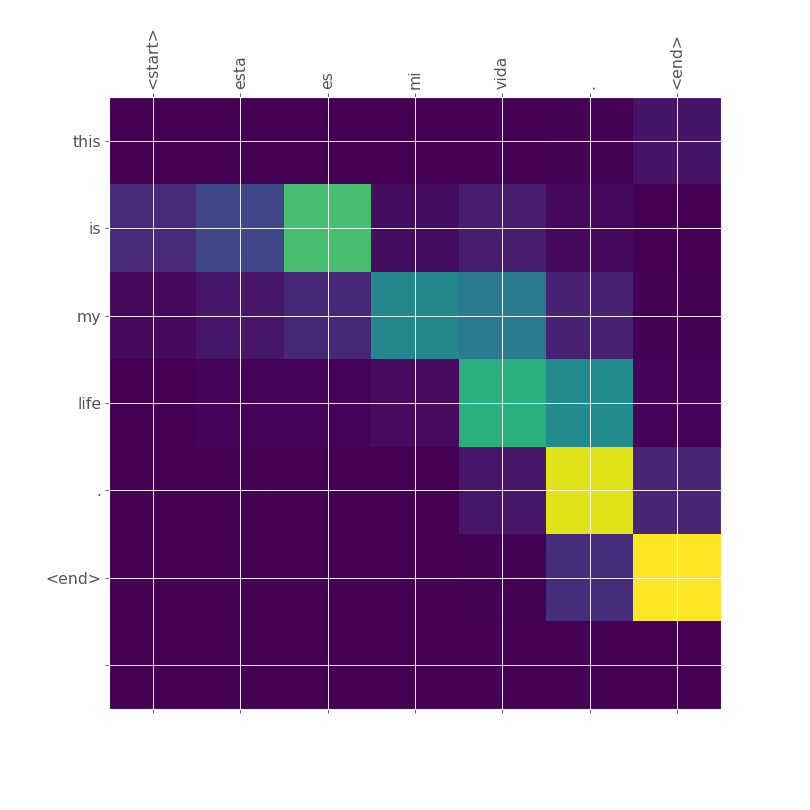

In [49]:
def translate(sentence):
    result, sentence, attention_plot = evaluate(sentence)
 
    print('Input: %s' % (sentence))
    print('Predicted translation: {}'.format(result))
 
    attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
    plot_attention(attention_plot, sentence.split(' '), result.split(' '))

checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

translate(u'esta es mi vida.')

In [1]:
#10.2.2 Bert
#pip install bert-for-tf2
#pip install sentencepiece

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import bert
import pandas as pd
movie_reviews = pd.read_csv("../chap10/data/IMDB Dataset.csv")
movie_reviews.isnull().values.any()
movie_reviews.shape

(50000, 2)

In [3]:
def preprocess_text(sen):
    sentence = remove_tags(sen)
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

reviews = []
sentences = list(movie_reviews['review'])
for sen in sentences:
    reviews.append(preprocess_text(sen))

print(movie_reviews.columns.values)

['review' 'sentiment']


In [4]:
movie_reviews.sentiment.unique()

array(['positive', 'negative'], dtype=object)

In [5]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [6]:
print(reviews[10])

Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines At first it was very odd and pretty funny but as the movie progressed didn find the jokes or oddness funny anymore Its low budget film thats never problem in itself there were some pretty interesting characters but eventually just lost interest imagine this film would appeal to stoner who is currently partaking For something similar but better try Brother from another planet 


In [7]:
print(y[10])

0


In [8]:
BertTokenizer = bert.bert_tokenization.FullTokenizer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [9]:
tokenizer.tokenize("don't be so judgmental")

['don', "'", 't', 'be', 'so', 'judgment', '##al']

In [10]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize("don't be so judgmental"))

[2123, 1005, 1056, 2022, 2061, 8689, 2389]

In [11]:
def tokenize_reviews(text_reviews):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_reviews))
tokenized_reviews = [tokenize_reviews(review) for review in reviews]

In [12]:
import random

reviews_with_len = [[review, y[i], len(review)]
                 for i, review in enumerate(tokenized_reviews)]
random.shuffle(reviews_with_len)
reviews_with_len.sort(key=lambda x: x[2])
sorted_reviews_labels = [(review_lab[0], review_lab[1]) for review_lab in reviews_with_len]
processed_dataset = tf.data.Dataset.from_generator(lambda: sorted_reviews_labels, output_types=(tf.int32, tf.int32))
BATCH_SIZE = 32
batched_dataset = processed_dataset.padded_batch(BATCH_SIZE, padded_shapes=((None, ), ()))
next(iter(batched_dataset))

(<tf.Tensor: shape=(32, 21), dtype=int32, numpy=
 array([[ 3078,  5436,  3078,  3257,  3532,  7613,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 2054,  5896,  2054,  2466,  2054,  6752,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 3191,  1996,  2338,  5293,  1996,  3185,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 2062, 23873,  3993,  2062, 11259,  2172,  2172,  2062, 14888,
             0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 2023,  3185,  2003,  6659,  2021,  2009,  2038,  2070,  2204,
          3896,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0],
        [ 1045,  2876,  9278,  2023,  2028,  2130,  2006,  7922, 12635,
    

In [13]:
import math

TOTAL_BATCHES = math.ceil(len(sorted_reviews_labels) / BATCH_SIZE)
TEST_BATCHES = TOTAL_BATCHES // 10
batched_dataset.shuffle(TOTAL_BATCHES)
test_data = batched_dataset.take(TEST_BATCHES)
train_data = batched_dataset.skip(TEST_BATCHES)

In [14]:
class TEXT_MODEL(tf.keras.Model):
    def __init__(self,
                 vocabulary_size,
                 embedding_dimensions=128,
                 cnn_filters=50,
                 dnn_units=512,
                 model_output_classes=2,
                 dropout_rate=0.1,
                 training=False,
                 name="text_model"):
        super(TEXT_MODEL, self).__init__(name=name)
        self.embedding = tf.keras.layers.Embedding(vocabulary_size,
                                          embedding_dimensions)
        self.cnn_layer1 = tf.keras.layers.Conv1D(filters=cnn_filters,
                                        kernel_size=2,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer2 = tf.keras.layers.Conv1D(filters=cnn_filters,
                                        kernel_size=3,
                                        padding="valid",
                                        activation="relu")
        self.cnn_layer3 = tf.keras.layers.Conv1D(filters=cnn_filters,
                                        kernel_size=4,
                                        padding="valid",
                                        activation="relu")
        self.pool = tf.keras.layers.GlobalMaxPool1D()
        self.dense_1 = tf.keras.layers.Dense(units=dnn_units, activation="relu")
        self.dropout = tf.keras.layers.Dropout(rate=dropout_rate)
        if model_output_classes == 2:
            self.last_dense = tf.keras.layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = tf.keras.layers.Dense(units=model_output_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        l = self.embedding(inputs)
        l_1 = self.cnn_layer1(l) 
        l_1 = self.pool(l_1) 
        l_2 = self.cnn_layer2(l) 
        l_2 = self.pool(l_2)
        l_3 = self.cnn_layer3(l)
        l_3 = self.pool(l_3)
        
        concatenated = tf.concat([l_1, l_2, l_3], axis=-1) 
        concatenated = self.dense_1(concatenated)
        concatenated = self.dropout(concatenated, training)
        model_output = self.last_dense(concatenated)
        return model_output

In [15]:
VOCAB_LENGTH = len(tokenizer.vocab)
EMB_DIM = 200
CNN_FILTERS = 100
DNN_UNITS = 256
OUTPUT_CLASSES = 2
DROPOUT_RATE = 0.2
NB_EPOCHS = 5

In [16]:
text_model = TEXT_MODEL(vocabulary_size=VOCAB_LENGTH,
                        embedding_dimensions=EMB_DIM,
                        cnn_filters=CNN_FILTERS,
                        dnn_units=DNN_UNITS,
                        model_output_classes=OUTPUT_CLASSES,
                        dropout_rate=DROPOUT_RATE)

In [17]:
if OUTPUT_CLASSES == 2:
    text_model.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])
else:
    text_model.compile(loss="sparse_categorical_crossentropy",
                       optimizer="adam",
                       metrics=["sparse_categorical_accuracy"])

text_model.fit(train_data, epochs=NB_EPOCHS)

Epoch 1/5
1407/1407 [==============================] - 188s 134ms/step - loss: 0.3018 - accuracy: 0.8676
Epoch 2/5
1407/1407 [==============================] - 197s 140ms/step - loss: 0.1321 - accuracy: 0.9520
Epoch 3/5
1407/1407 [==============================] - 188s 134ms/step - loss: 0.0645 - accuracy: 0.9770
Epoch 4/5
1407/1407 [==============================] - 188s 134ms/step - loss: 0.0374 - accuracy: 0.9868
Epoch 5/5
1407/1407 [==============================] - 188s 134ms/step - loss: 0.0280 - accuracy: 0.9901


In [18]:
results = text_model.evaluate(test_data)
print(results)

156/156 [==============================] - 2s 13ms/step - loss: 0.4185 - accuracy: 0.9000
[0.41852515935897827, 0.9000400900840759]


In [19]:
#!pip install sentencepiece

import pandas as pd
import bert
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
train_data = pd.read_csv('../chap10/data/train.csv')
test_data = pd.read_csv('../chap10/data/test.csv')

In [21]:
url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/2'
bert_layer = hub.KerasLayer(url, trainable=True)

In [22]:
FullTokenizer=bert.bert_tokenization.FullTokenizer

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer=FullTokenizer(vocab_file,do_lower_case)

In [23]:
def bert_encoder(texts, tokenizer, max_len=512):    
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
        
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [24]:
train_input = bert_encoder(train_data, tokenizer, max_len=160)
train_labels = train_data.target.values

In [25]:
def build_model(max_len=512):
    input_word_ids = tf.keras.layers.Input(shape=(max_len,), 
                                 dtype=tf.int32, name='positional_ids')
    input_segment_ids = tf.keras.layers.Input(shape=(max_len,), 
                                    dtype=tf.int32, name='segment_ids')
    input_mask = tf.keras.layers.Input(shape=(max_len,), 
                              dtype=tf.int32, name='input_mask')
    pooled_output, sequence_output = bert_layer([input_word_ids, 
                                                 input_mask, 
                                                 input_segment_ids])
    clf_output = sequence_output[:, 0, :]
    output = tf.keras.layers.Dense(1, activation='sigmoid')(clf_output)
    model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_segment_ids], 
                        outputs=output)
    model.compile(optimizer= RMSprop(lr=2e-6), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

In [26]:
model = build_model(max_len=160)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
positional_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      [(None, 1024), (None 335141889   positional_ids[0][0]             
                                                                 input_mask[0][0]      

In [27]:
train_history = model.fit(
    train_input, train_labels,
    validation_split=0.2,
    epochs=3,
    batch_size=8
)

Epoch 1/3
1/1 [==============================] - 2s 2s/step - loss: 0.7689 - accuracy: 0.5000 - val_loss: 0.2230 - val_accuracy: 1.0000
Epoch 2/3
1/1 [==============================] - 1s 1s/step - loss: 0.4062 - accuracy: 1.0000 - val_loss: 0.1478 - val_accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 1s 980ms/step - loss: 0.2560 - accuracy: 1.0000 - val_loss: 0.1091 - val_accuracy: 1.0000


In [28]:
#10.3 한국어 임베딩

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

text="""과일 가게에 사과가 많이 진열되어 있다
그녀가 나에게 사과한 후, 우리는 친해졌다
애플은 사과 모양을 로고로 사용한다\n"""

In [30]:
tok = Tokenizer()
tok.fit_on_texts([text])

vocSize=len(tok.word_index)+1

seqs = list()
for word in text.split("\n"):
    encoded = tok.texts_to_sequences([word])[0]
    for i in range(1, len(encoded)):
        seq = encoded[:i+1]
        seqs.append(seq)
        
maxLen=max(len(i) for i in seqs)

seqs=pad_sequences(seqs ,maxlen=maxLen, padding="pre") 
seqs 

array([[ 0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  1,  2,  3],
       [ 0,  0,  1,  2,  3,  4],
       [ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [ 0,  0,  0,  0,  7,  8],
       [ 0,  0,  0,  7,  8,  9],
       [ 0,  0,  7,  8,  9, 10],
       [ 0,  7,  8,  9, 10, 11],
       [ 7,  8,  9, 10, 11, 12],
       [ 0,  0,  0,  0, 13, 14],
       [ 0,  0,  0, 13, 14, 15],
       [ 0,  0, 13, 14, 15, 16],
       [ 0, 13, 14, 15, 16, 17]])

In [31]:
seqs = np.array(seqs)
x = seqs[:,:-1]

In [32]:
from tensorflow.keras.utils import to_categorical
y = seqs[:, -1]
y = to_categorical(y, num_classes = vocSize)

In [33]:
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(Embedding(vocSize, 10, input_length= maxLen-1, ))         
model.add(LSTM(32))
model.add(Dense(vocSize, activation="softmax"))
model.compile(loss="categorical_crossentropy", metrics = ["accuracy"], optimizer ="adam")
model.fit(x,y,epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 2ms/step - loss: 2.8920 - accuracy: 0.0714
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 2.8903 - accuracy: 0.0714
Epoch 3/200
1/1 [==============================] - 0s 999us/step - loss: 2.8887 - accuracy: 0.1429
Epoch 4/200
1/1 [==============================] - 0s 999us/step - loss: 2.8870 - accuracy: 0.0714
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 2.8854 - accuracy: 0.0714
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 2.8837 - accuracy: 0.0714
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 2.8821 - accuracy: 0.0714
Epoch 8/200
1/1 [==============================] - 0s 1ms/step - loss: 2.8804 - accuracy: 0.0714
Epoch 9/200
1/1 [==============================] - 0s 998us/step - loss: 2.8786 - accuracy: 0.1429
Epoch 10/200
1/1 [==============================] - 0s 1ms/step - loss: 2.8769 - accuracy: 0.1429
Epoch 11/200
1/1 [=====

In [34]:
def sentGen(model, tok, word, n):  
    sent = ""
    word2=word
    for _ in range(n):  
        encoded = tok.texts_to_sequences([word])[0] 
        encoded = pad_sequences([encoded], maxlen = 7, padding="pre")
        res = model.predict_classes(encoded)

        for w , i in tok.word_index.items(): 
            if i == res:  
                break 
        word = word + " " + w
        sent = sent + " " + w
    sent = word2 + sent 
    return sent 

In [35]:
print(sentGen(model, tok, "과일",2))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


과일 사과 사과
